In [51]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

In [5]:
pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = Sequential()

model.add(Input(shape=(4,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.get_weights()

[array([[-0.12548232, -0.27580374,  0.6733219 ,  0.13281953, -0.36400613,
         -0.6939222 , -0.40829673, -0.34251294],
        [ 0.5932805 ,  0.2407524 , -0.40848118, -0.16687018,  0.6267126 ,
         -0.21640012,  0.5417593 ,  0.22467136],
        [-0.5809672 ,  0.32563275,  0.70091385,  0.5084304 ,  0.28979027,
          0.58311754, -0.3223644 , -0.53624684],
        [ 0.14522642,  0.03236628,  0.6819399 ,  0.5872496 ,  0.45644182,
         -0.5626031 ,  0.28162557,  0.07211041]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.4810953 , -0.02250135,  0.10516512,  0.51947653,  0.36024284,
         -0.05428958],
        [-0.15251714,  0.64375293, -0.22511086,  0.43892097,  0.03455961,
          0.22811776],
        [-0.29097778,  0.19577223,  0.64477026,  0.3783816 ,  0.5974926 ,
          0.43653524],
        [-0.01632476, -0.63811666, -0.4932127 , -0.30282515, -0.3663881 ,
          0.00345159],
        [-0.15094727, -0.4478755 ,  0.2669654 

In [45]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [53]:
history = model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0077
Epoch 2/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0104
Epoch 3/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0076
Epoch 4/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0063
Epoch 5/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0055
Epoch 6/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0059
Epoch 7/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0040
Epoch 8/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0085
Epoch 9/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0040
Epoch 10/10
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0043


In [54]:
predictions = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [55]:
predicted_classes = (predictions > 0.5).astype(int)

In [56]:
print(accuracy_score(y_test, predicted_classes))

0.9854545454545455


In [57]:
print(classification_report(y_test, predicted_classes))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



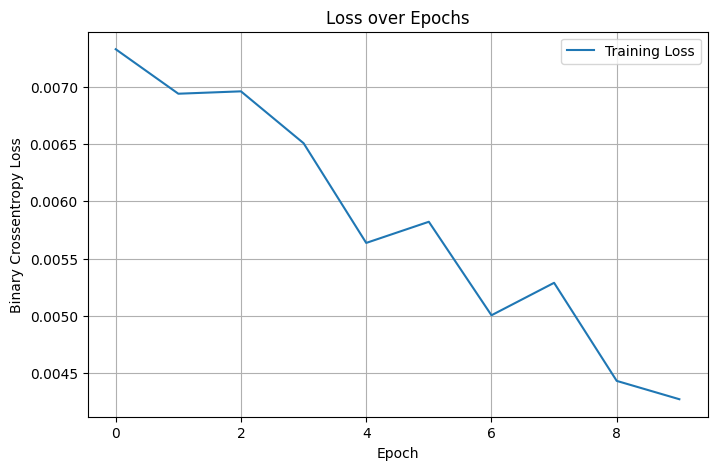

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()
